In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
dirdatain = '../data/'

mydf = pd.read_csv(dirdatain+'bsm_raw_pollen.csv')
mydf = mydf.fillna(0)
mydf = mydf.sort_values(by=['age'])
all_my_species = list(mydf.columns)

myspecies = ['Betula', 'Pinus', 'Corylus', 'Artemisia', 'Olea']
myspecies = ['Pinus', 'Betula']
myspecies = all_my_species[1:]

fit_type = 'raw'
fit_type = 'grid'
fit_type = 'fit_140_0.01'

results = pd.read_pickle(f'results/results_basa_CCM_{fit_type}.pkl')
results_TE = pd.read_pickle(f'results/results_basa_TE_{fit_type}_k_10_emb_1.pkl')


Text(0, 0.5, 'Frequency')

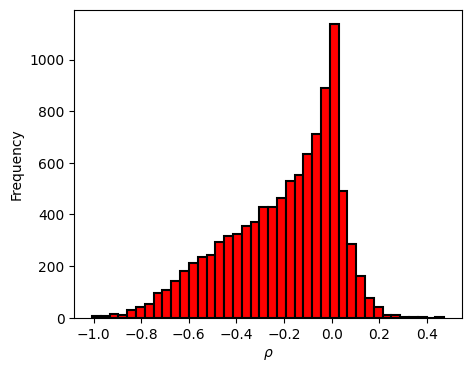

In [ ]:
# make a histogram of the simulations that end up with certain rhos
fig,ax = plt.subplots(figsize=(5,4))

# get the rhos
data = []
for i, columns in enumerate(myspecies):
    for j, target in enumerate(myspecies):
        if i <= j:
            continue
        # if its not in the results, continue
        if columns+':'+target not in results.keys():
            continue
        rho = results[columns+':'+target].iloc[-1]
        te = results_TE[columns+':'+target]

        data.append({'rho': rho[columns+':'+target], 'te': te[columns+':'+target], 'species1': columns, 'species2': target})
        data.append({'rho': rho[target+':'+columns], 'te': te[target+':'+columns], 'species1': target, 'species2': columns})

rhos_df = pd.DataFrame(data)

ax.hist(rhos_df['te'], bins=40, histtype='bar', color='red', edgecolor='black', linewidth=1.5,
         zorder=1, rwidth=2)
ax.set_xlabel(r'$\rho$')
ax.set_ylabel('Frequency')

# fig.savefig(f'plots_notes/histogram_rho_{fit_type}.png', bbox_inches='tight')


In [4]:
rhos_df = rhos_df.sort_values(by=['te'], ascending=False).reset_index(drop=True)
rhos_df

,rho,te,species1,species2
0,0.03634,0.472641,Lemna,Lonicera
1,0.31772,0.377820,Urticaceae,Primulaceae
2,0.35108,0.358177,Scrophulariaceae,Juniperus
3,0.04318,0.320126,Cardueae,Potamogeton
4,0.16613,0.291497,Lythrum,Lonicera
...,...,...,...,...
9895,-0.06240,-0.976687,Lamiaceae,Polygonaceae
9896,-0.08315,-0.985861,Helianthemum,Polygonaceae
9897,-0.07031,-0.988074,Pinus,Abies
9898,0.11366,-0.989568,Thalictrum,Sparganium


/tmp/ipykernel_320/2377343950.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(rhos_df[rhos_df['species1'] == species1][rhos_df['species2'] == species2])
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


          rho        te species1 species2
6594  0.63529 -0.281577    Pinus   Betula


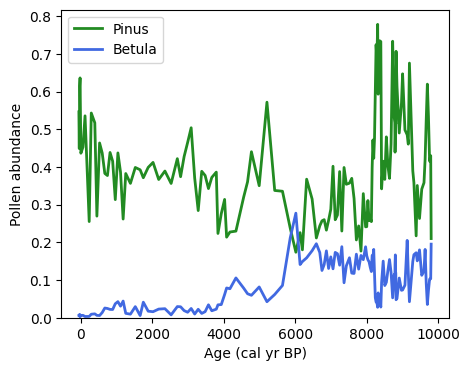

In [18]:
# find which ones have the most causality

# rho, species1, species2 = rhos_df.iloc[21][['rho', 'species1','species2']]
rho, te, species1, species2 = rhos_df.iloc[0][['rho', 'te', 'species1','species2']]

# species2 = 'Osmunda'
# species1 = 'Gentiana'

species1 = 'Pinus'
species2 = 'Betula'

print(rhos_df[rhos_df['species1'] == species1][rhos_df['species2'] == species2])

species_GAM = pd.read_pickle(f'GAM_species/species_{fit_type}.pkl')
x = species_GAM[species1]['y']
y = species_GAM[species2]['y']
t = species_GAM[species1]['x']

# plot the time series
fig,ax = plt.subplots(figsize=(5,4))
ax.plot(mydf['age'], mydf[species1], label=species1, lw = 2, color = 'forestgreen')
ax.plot(mydf['age'], mydf[species2], label=species2, lw = 2, color = 'royalblue')
# ax.plot(-t, x, label=f'{species1} GAM', color='black', lw=0.5)
# ax.plot(-t, y, label=f'{species2} GAM', color='black', lw=0.5)
ax.set_xlabel('Age (cal yr BP)')
ax.set_ylabel('Pollen abundance')
ax.legend()
ax.set_ylim(0,)
# fig.savefig(f'plots_notes/timeseries_{species1}_{species2}_{fit_type}.png', bbox_inches='tight')
fig.savefig(f'fises2025.eps', bbox_inches='tight')

Text(299.63131313131305, 0.5, 'y(t+1)')

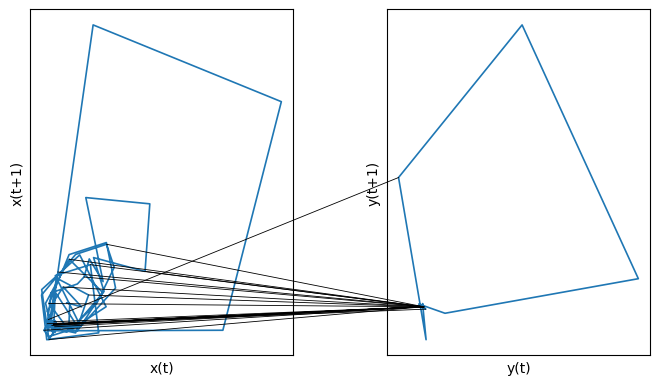

In [106]:
import pyEDM as edm
x = species_GAM[species1]['y']
y = species_GAM[species2]['y']
# edm.EmbedDimension(dataFrame=pd.DataFrame({'x': x, 'y': y}), tau=1, columns=['x'], target='y', lib=(12, 100), pred=(1, 100), maxE=20)

embedded = edm.Embed(dataFrame=pd.DataFrame({'x': x, 'y': y}), columns=['x','y'], E=2, tau=1)

fig, axes = plt.subplots(1, 2, figsize=(7, 4))
ax = axes[0]
ax2 = axes[1]
ax. plot(embedded[f'x(t+0)'], embedded[f'x(t+1)'], lw=1.2)
ax2.plot(embedded[f'y(t+0)'], embedded[f'y(t+1)'], lw=1.2)
ax. set_xlim()
ax. set_ylim()
ax2.set_xlim()
ax2.set_ylim()

fig.tight_layout()

# remove xticks and yticks
ax.set_xticks([])
ax.set_yticks([])
ax2.set_xticks([])
ax2.set_yticks([])

# draw a line between two points, each on a different axes, by converting the points to the figure coordinate system
def draw_line(ax1, ax2, x1, y1, x2, y2, **args):
    # convert the points from the data (example: 104, 0.04, 200, 0.06 instead of something that goes from 0 to 1) to the figure coordinate system
    fig = ax1.get_figure()

    x1_fig, y1_fig = fig.transFigure.inverted().transform(ax1.transData.transform([x1, y1]))
    x2_fig, y2_fig = fig.transFigure.inverted().transform(ax2.transData.transform([x2, y2]))

    # draw the line
    fig.lines.append(plt.Line2D([x1_fig, x2_fig], [y1_fig, y2_fig], transform=fig.transFigure, **args))

for i in range(0, len(embedded), 5):
    draw_line(ax, ax2, embedded[f'x(t+0)'].iloc[i], embedded[f'x(t+1)'].iloc[i],
                embedded[f'y(t+0)'].iloc[i], embedded[f'y(t+1)'].iloc[i],
                lw = 0.6, color = 'black')
    
ax.set_xlabel('x(t)')
ax.set_ylabel('x(t+1)')

ax2.set_xlabel('y(t)')
ax2.set_ylabel('y(t+1)')

# fig.savefig('plots_notes/phase_space_grid.png', bbox_inches='tight')

MovieWriter ffmpeg unavailable; using Pillow instead.


/home/paval/papers/CORREDORAS/pablo_python/.conda/lib/python3.10/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: The behavior of Series.argsort in the presence of NA values is deprecated. In a future version, NA values will be ordered last instead of set to -1.
  return bound(*args, **kwds)
/home/paval/papers/CORREDORAS/pablo_python/.conda/lib/python3.10/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: The behavior of Series.argsort in the presence of NA values is deprecated. In a future version, NA values will be ordered last instead of set to -1.
  return bound(*args, **kwds)
/home/paval/papers/CORREDORAS/pablo_python/.conda/lib/python3.10/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: The behavior of Series.argsort in the presence of NA values is deprecated. In a future version, NA values will be ordered last instead of set to -1.
  return bound(*args, **kwds)
/home/paval/papers/CORREDORAS/pablo_python/.conda/lib/python3.10/site-packages/numpy/core/f

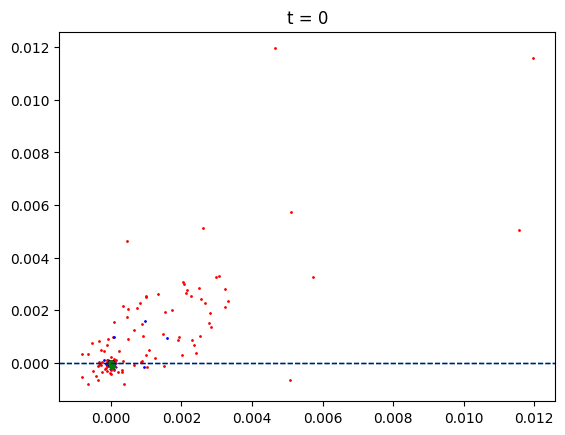

In [8]:
import matplotlib.animation as animation

embedding = edm.Embed(dataFrame=pd.DataFrame({'x': x, 'y': y}), E=2, tau=1, columns=['x','y'])

fig, ax = plt.subplots()

def update(i):
    point = embedding.iloc[i]
    distances = np.sqrt((embedding['x(t+0)'] - point['x(t+0)'])**2 + (embedding['x(t+1)'] - point['x(t+1)'])**2)
    neighbors = embedding.iloc[np.argsort(distances)[1:4]]
    ax.clear()
    ax.scatter('x(t+0)', 'x(t+1)', data = embedding, marker='o', color='r', linestyle='None', label='x', s=1)
    ax.scatter('y(t+0)', 'y(t+1)', data = embedding, marker='o', color='b', linestyle='None', label='y', s = 1)
    ax.scatter(neighbors['x(t+0)'], neighbors['x(t+1)'], marker='x', color='purple', linestyle='None', label='x', s=15)
    ax.scatter(neighbors['y(t+0)'], neighbors['y(t+1)'], marker='x', color='black', linestyle='None', label='y', s = 15)
    ax.scatter(point['x(t+0)'], point['x(t+1)'], marker='o', color='green', linestyle='None', label='x', s=15)
    ax.scatter(point['y(t+0)'], point['y(t+1)'], marker='o', color='green', linestyle='None', label='y', s = 15)

    # draw horizontal line at embedding['y(t+1)'][i]
    ax.axhline(y=point['y(t+1)'], color='g', lw=1, ls='--')
    # predict point['y(t+1)'] from the neighbors average
    prediction = neighbors['y(t+1)'].mean()
    ax.axhline(y=prediction, color='b', lw=1, ls='--')

    ax.set_title('t = {}'.format(i))

    return ax

ax.set_xlim(-1.1, 1.1)
ax.set_ylim(-1.1, 1.1)
ax.set_xlabel('t+0')
ax.set_ylabel('t+1')

ani = animation.FuncAnimation(fig, update, frames=range(0,len(embedding), 1))
ani.save('plots-tests/animation_2.gif', fps = 1)

/home/paval/papers/CORREDORAS/pablo_python/.conda/lib/python3.10/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: The behavior of Series.argsort in the presence of NA values is deprecated. In a future version, NA values will be ordered last instead of set to -1.
  return bound(*args, **kwds)
/tmp/ipykernel_14943/2901380147.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  points = pd.concat([points, pd.DataFrame({'true': [point['y(t+1)']], 'predicted': [prediction]})], axis=0, ignore_index=True)
/home/paval/papers/CORREDORAS/pablo_python/.conda/lib/python3.10/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: The behavior of Series.argsort in the presence of NA values is deprecated. In a future version, NA values will b

               true  predicted
true       1.000000   0.999849
predicted  0.999849   1.000000
               true  predicted
true       1.000000   0.942199
predicted  0.942199   1.000000


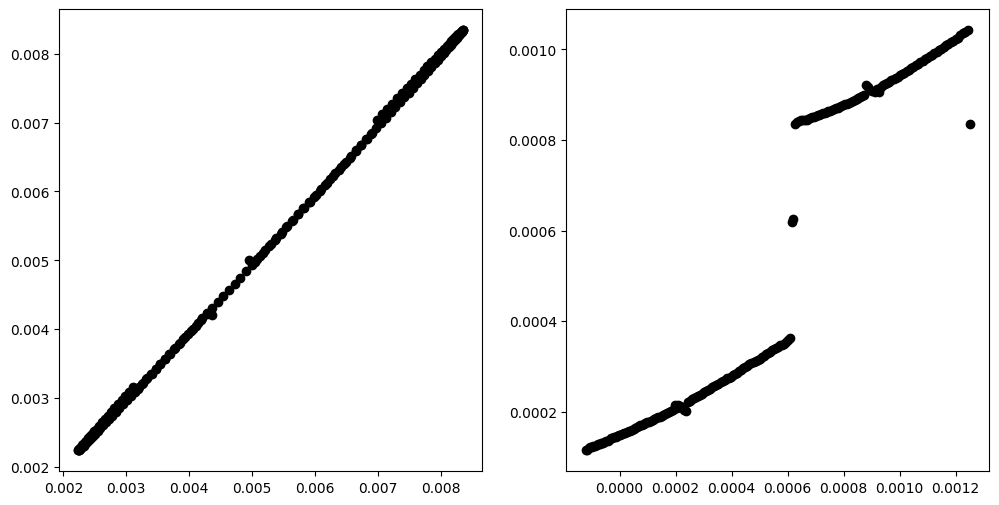

In [65]:
# make a scatter plot of predictions against true values

points = pd.DataFrame(columns=['true', 'predicted'])
embedding = edm.Embed(dataFrame=pd.DataFrame({'x': x, 'y': y}), E=2, tau=1, columns=['x','y'])
fig, axes = plt.subplots(1,2, figsize=(12,6))
ax = axes[0]
for i in range(1, len(embedding)):
    point = embedding.iloc[i]
    distances = np.sqrt((embedding['x(t+0)'] - point['x(t+0)'])**2 + (embedding['x(t+1)'] - point['x(t+1)'])**2)
    neighbors = embedding.iloc[np.argsort(distances)[1:4]]
    prediction = neighbors['y(t+1)'].mean()
    points = pd.concat([points, pd.DataFrame({'true': [point['y(t+1)']], 'predicted': [prediction]})], axis=0, ignore_index=True)
    ax.scatter(point['y(t+1)'], prediction, color='black')

points2 = pd.DataFrame(columns=['true', 'predicted'])
embedding = edm.Embed(dataFrame=pd.DataFrame({'x': y, 'y': x}), E=2, tau=1, columns=['x','y'])
ax2 = axes[1]
for i in range(1, len(embedding)):
    point = embedding.iloc[i]
    distances = np.sqrt((embedding['x(t+0)'] - point['x(t+0)'])**2 + (embedding['x(t+1)'] - point['x(t+1)'])**2)
    neighbors = embedding.iloc[np.argsort(distances)[1:4]]
    prediction = neighbors['y(t+1)'].mean()
    points2 = pd.concat([points2, pd.DataFrame({'true': [point['y(t+1)']], 'predicted': [prediction]})], axis=0, ignore_index=True)
    ax2.scatter(point['y(t+1)'], prediction, color='black')

# print the correlation between the true and predicted values
print(points.corr())
print(points2.corr())

Pinus Pinus
Pinus Betula
Betula Betula


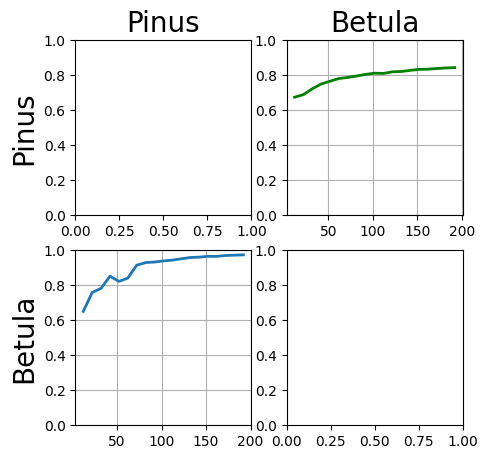

In [5]:
fig, axes = plt.subplots(len(myspecies), len(myspecies), figsize=(5,5))

for i, columns in enumerate(myspecies):
    for j, target in enumerate(myspecies):
        if i <= j:  # The crucial condition: i must be less than j
            print(columns, target)
            continue
        if columns+':'+target not in results.keys():
            continue
        result = results[columns+':'+target]
        axes[i,j].plot(result['LibSize'], result[columns+':'+target], lw=2)
        axes[j,i].plot(result['LibSize'], result[target+':'+columns], lw=2, color='green')

        axes[i,j].set_ylim(0,1)
        axes[j,i].set_ylim(0,1)

        axes[i,j].grid()
        axes[j,i].grid()
        
for i, columns in enumerate(myspecies):
    axes[i,0].set_ylabel(columns, fontsize=20)
    axes[0,i].set_title(columns, fontsize=20)

# fig.savefig(f'plots-tests/basa_CCM_{fit_type}.pdf', bbox_inches='tight')

In [82]:
columns = 'Olea'
species = pd.read_pickle('GAM_species/species_raw.pkl')
pair = pd.DataFrame({columns : species[columns]['prev_y'], target : species[target]['prev_y']}, index=species[columns]['prev_x'])
species[columns]['prev_y']

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [68]:
pair = pd.read_pickle('pair_files/pair_Pinus_Betula.pkl')
columns = 'Pinus'
target = 'Betula'
pair.plot(y=['Pinus', 'Betula'], kind='line', lw=2)

FileNotFoundError: [Errno 2] No existe el fichero o el directorio: 'pair_files/pair_Pinus_Betula.pkl'

In [19]:
import pyEDM as edm
dfE = edm.EmbedDimension(dataFrame=pair, lib = [1, len(pair)], pred = [1, len(pair)],
                            columns=columns, target=target, showPlot=False, maxE=10, numProcess=1)
dfE.plot('E', 'rho',figsize=(3,3))
E = int(dfE.iloc[dfE['rho'].idxmax()]['E'])


NameError: name 'pair' is not defined

MovieWriter ffmpeg unavailable; using Pillow instead.


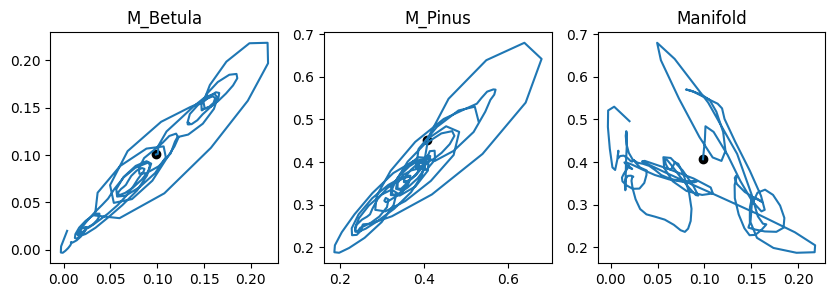

In [ ]:
embedded = edm.Embed(dataFrame=pair, E = 2, columns=[columns, target], tau=-1)
fig, axes = plt.subplots(1, 3, figsize=(10, 3))
ax = axes[0]
ax2 = axes[1]
ax3 = axes[2]
ax.plot(embedded['Betula(t-0)'], embedded['Betula(t-1)'])
ax2.plot(embedded['Pinus(t-0)'], embedded['Pinus(t-1)'])
ax3.plot(embedded['Betula(t-0)'], embedded['Pinus(t-0)'])


# make animation of the point moving along the attractor
from matplotlib.animation import FuncAnimation

ax.set_title('M_Betula')
ax2.set_title('M_Pinus')
ax3.set_title('Manifold')

scat = ax.scatter(embedded['Betula(t-0)'], embedded['Betula(t-1)'], c='black')
scat2 = ax2.scatter(embedded['Pinus(t-0)'], embedded['Pinus(t-1)'], c='black')
scat3 = ax3.scatter(embedded['Betula(t-0)'], embedded['Pinus(t-0)'], c='black')

def update(frame):
    idx = frame
    scat.set_offsets(np.c_[embedded['Betula(t-0)'].iloc[idx], embedded['Betula(t-1)'].iloc[idx]])
    scat2.set_offsets(np.c_[embedded['Pinus(t-0)'].iloc[idx], embedded['Pinus(t-1)'].iloc[idx]])
    scat3.set_offsets(np.c_[embedded['Betula(t-0)'].iloc[idx], embedded['Pinus(t-0)'].iloc[idx]])
    return scat,

ani = FuncAnimation(fig, update, frames=range(0, len(embedded)), blit=True)
# mp4 is unknown extention
ani.save('plots-tests/animation.gif', fps = 10)


In [ ]:
def nearest_neighbors(x, x0, d):
    return np.linalg.norm(x - x0, axis=1) < d



array([False, False,  True])